<a href="https://colab.research.google.com/github/kumarmayank29/Breast-Cancer-Detection-Model/blob/main/Breast_Cancer_Detection_Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1 )Topic of Project-    BREAST CANCER 
                     DETECTION




2)Project Description- 

I implemented Breast cancer Detection using various machine learning algorithms like logistic regression,KNN,Random forest,Decision tree,SVM and also found out accuracy score in each case.Best Accuracy was given by Random forest on Testing data 97.9%                






# **Importing Libraries**

In [2]:
# Breat Cancer Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Data**

In [3]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('BCDdata.csv')


Saving BCDdata.csv to BCDdata (1).csv


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Exploratory Data Analysis**

# Shape of Dataset

In [5]:
df.shape

(569, 33)

# Removing Null/Missing Values

In [6]:
df.isna().sum()
# Here all Values are non zero except column 33 (Unnamed: 32) where all values are NaN 
#There we drop column Unnamed :32
   

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df=df.dropna(axis=1)

In [8]:
df.shape
#Since One column has been dropped so total Colms are 32 

(569, 32)

# Counting Total Malignant and Benign Cases

In [9]:
df['diagnosis'].value_counts()
# 357 Patients are Benign(No Cancer) and 212 are Malignant(Suffering from Cancer)

B    357
M    212
Name: diagnosis, dtype: int64

# Visualizing The No of Cases on Graph

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


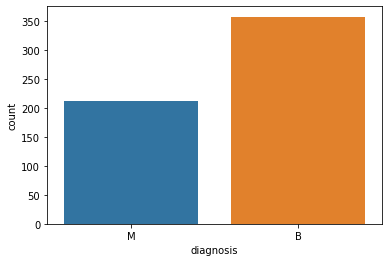

In [10]:
sns.countplot(df['diagnosis'],label='Count')

# Checking Type of Data to Encode(If Required) 

In [11]:
df.dtypes
#We Observe Diagnosis is of object type which we need to encode Because model cannot accept
#Alphabetical values M and B

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Encoding Categorical Data(M and B)

In [12]:
#Before Encoding
df.iloc[:,1].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [13]:
#After Transformation and Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1])



# Creating a Pair Plot

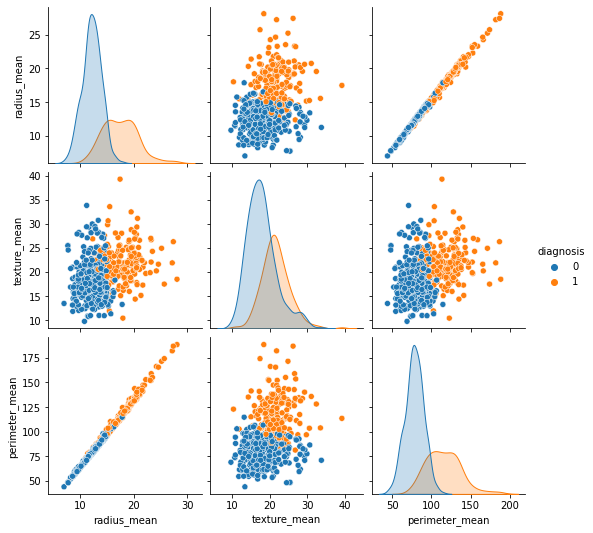

In [14]:
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')
              


# Understanding Co-realtions Between Columns 

In [15]:
df.iloc[:,1:33].corr()
#Finding Corelations  help in finding percentage of dependencies of one columns with other .If corelation is 
#zero this means degree of dependencies is Null

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Visualizing the Co-relations

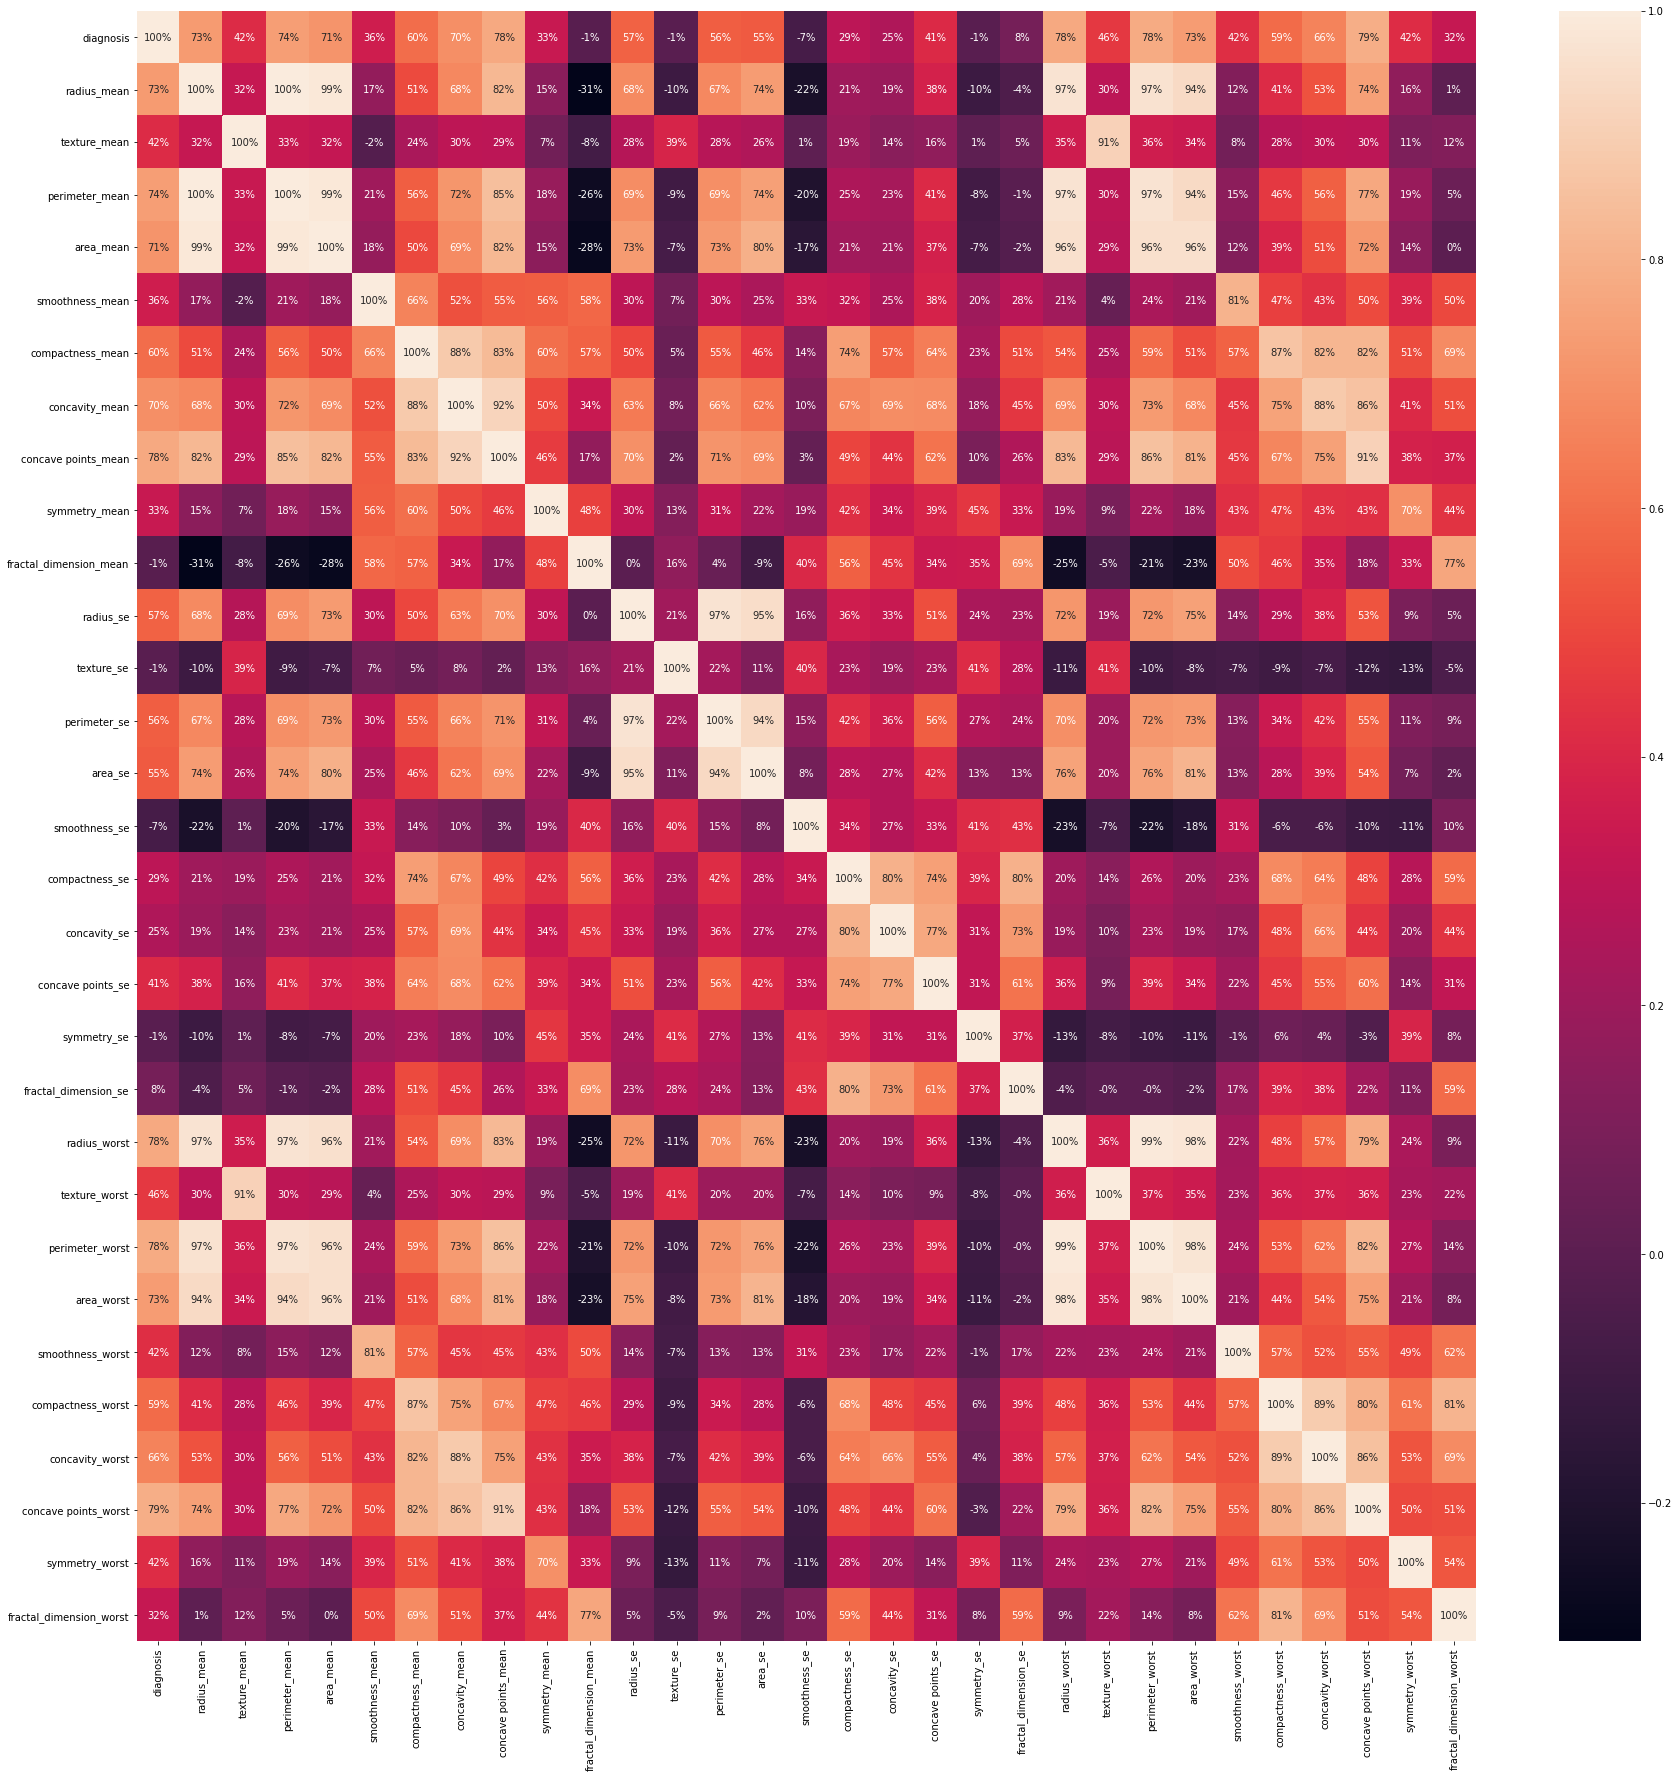

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(df.iloc[:,1:33].corr(),annot=True,fmt='.0%')

# Splitting Data in Dependent(Y) and Independent(X) datasets

In [17]:
X=df.iloc[:,2:33].values
Y=df.iloc[:,1].values
# X shall contain Features which help in determining if Cell is Cancerous or not 
# Y tells if cell is Malignant or Benign

# Train Test Split 

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

# Feature Scaling( Scale the Data )

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


## **Create Functions for Model Training**

In [20]:
  #SVM
  from sklearn.svm import SVC
  SVMclassifier=SVC(kernel='linear',random_state=0)
  SVMclassifier.fit(X_train,Y_train)
  print('SVM training Accuracy',SVMclassifier.score(X_train,Y_train))






SVM training Accuracy 0.9859154929577465


In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)
print('Logistic Regression training Accuracy',log.score(X_train,Y_train))


Logistic Regression training Accuracy 0.9906103286384976


In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)
print('Random Forest Classifier training Accuracy',forest.score(X_train,Y_train))

Random Forest Classifier training Accuracy 0.9976525821596244


In [23]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,Y_train)
print('Decision Tree Classifier training Accuracy',tree.score(X_train,Y_train))

Decision Tree Classifier training Accuracy 1.0


In [24]:
  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  KNNclassifier.fit(X_train, Y_train)
  print('K-Nearest Neighbour Classifier training Accuracy',KNNclassifier.score(X_train,Y_train))

K-Nearest Neighbour Classifier training Accuracy 0.9741784037558685


# Now We'll Test Model Accuracy of Testing data using a Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,SVMclassifier.predict(X_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1] 
print("The CM for SVM")
print(cm)
print("Testing accuracy=",(TP+TN)/(TP+TN+FN+FP))

print()

cm=confusion_matrix(Y_test,log.predict(X_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1] 
print("The CM for Logistic Regression")
print(cm)
print("Testing accuracy=",(TP+TN)/(TP+TN+FN+FP))

print()



cm=confusion_matrix(Y_test,forest.predict(X_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1] 
print("The CM for Random Forest")
print(cm)
print("Testing accuracy=",(TP+TN)/(TP+TN+FN+FP))

print()


cm=confusion_matrix(Y_test,tree.predict(X_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1] 
print("The CM for Decision Tress classifier")
print(cm)
print("Testing accuracy=",(TP+TN)/(TP+TN+FN+FP))

print()


cm=confusion_matrix(Y_test,KNNclassifier.predict(X_test))
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1] 
print("The CM for K Nearest Neighbour")
print(cm)
print("Testing accuracy=",(TP+TN)/(TP+TN+FN+FP))



The CM for SVM
[[85  5]
 [ 2 51]]
Testing accuracy= 0.951048951048951

The CM for Logistic Regression
[[86  4]
 [ 2 51]]
Testing accuracy= 0.958041958041958

The CM for Random Forest
[[88  2]
 [ 1 52]]
Testing accuracy= 0.9790209790209791

The CM for Decision Tress classifier
[[85  5]
 [ 3 50]]
Testing accuracy= 0.9440559440559441

The CM for K Nearest Neighbour
[[89  1]
 [ 6 47]]
Testing accuracy= 0.951048951048951


# **Detailed Metrics**

# **SVM**

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Classification Report and Accuracy Score for SVM")
print()
print(classification_report(Y_test,SVMclassifier.predict(X_test)))
print(accuracy_score(Y_test,SVMclassifier.predict(X_test)))



Classification Report and Accuracy Score for SVM

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


# **Logistic Regression**

In [27]:
print("Classification Report and Accuracy Score for Logistic Regression")
print()
print(classification_report(Y_test,log.predict(X_test)))
print(accuracy_score(Y_test,log.predict(X_test)))

Classification Report and Accuracy Score for Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958


# **Random Forest**

In [28]:
print("Classification Report and Accuracy Score for Randome forest classifier")
print()
print(classification_report(Y_test,forest.predict(X_test)))
print(accuracy_score(Y_test,forest.predict(X_test)))

Classification Report and Accuracy Score for Randome forest classifier

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


# **Decision Tree Classifier**

In [29]:
print("Classification Report and Accuracy Score for Randome forest classifier")
print()
print(classification_report(Y_test,tree.predict(X_test)))
print(accuracy_score(Y_test,tree.predict(X_test)))

Classification Report and Accuracy Score for Randome forest classifier

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441


# **K-Nearest Neighbour**

In [30]:
print("Classification Report and Accuracy Score for K Nearest Neighbour classifier")
print()
print(classification_report(Y_test,KNNclassifier.predict(X_test)))
print(accuracy_score(Y_test,KNNclassifier.predict(X_test)))

Classification Report and Accuracy Score for K Nearest Neighbour classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


# **Printing Predictions of Best Classifier between all Random Forest Classifier**


In [31]:
print("Result predicted by Model")
predict=forest.predict(X_test)
print(predict)
print()
print("Actual Values of Dataset")
print(Y_test)

Result predicted by Model
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Actual Values of Dataset
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
